In [25]:
import pandas as pd
import matplotlib as mt
import os
import traceback

#refactor the who code to the new database


#this will give you a list of stocks from the folder
cleaned_data_path='/workspaces/TosChartWeb/TosChart/cleaned_data'

stocks=os.listdir(cleaned_data_path)

lists=[]
####
##cleans all the strategy file so they match the same format
###
for stock in stocks:
    try:
        dt=pd.read_csv(cleaned_data_path+'/'+stock)
        dt.drop(columns=['Price','Amount','Position','P/L', 'Unnamed: 9','Side'], inplace=True)

        symb=dt.columns[0]
        date=dt.columns[2]

        ####
        for ind,num in enumerate(dt[date]):
            if ind%2!=0:
                if ind>0:
                    dt.loc[ind-1, date]+='-'+num
            #trying somethin

        dt['Trade P/L']=dt['Trade P/L'].shift(periods=-1)

        for i,id in enumerate(dt[symb]):
            if int(id)%2==0:
                dt.drop(i, inplace=True)

        dt.dropna(inplace=True)
        hold=[]

        #creating holding period because i want to know how long i held the stock
        for index,date in enumerate(dt[date]):
            open, close=date.split('-')
            hold.append(pd.to_datetime(close)-pd.to_datetime(open))
        dt['Holding Time']=hold

        g=dt.columns[0].split()
        dt['Id']=g[1]
        dt.drop(columns=symb, inplace=True)
        lists.append(dt)
    except Exception as e:
        print(e)
        continue
dt.head()
    ##can i append a 

'utf-8' codec can't decode byte 0xff in position 1: invalid start byte


,Strategy,Date/Time,Trade P/L,Holding Time,Id


In [26]:
comb=pd.concat(lists)
comb['Trade P/L'] = comb['Trade P/L'].str.replace(r'[\$,]', '', regex=True).replace(r'\((\d+(\.\d+)?)\)', r'-\1', regex=True)
comb['Trade P/L']=pd.to_numeric(comb['Trade P/L'])

comb['Trade P/L'].describe()

/tmp/ipykernel_3949/3583032429.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comb=pd.concat(lists)


count    1473.00000
mean       18.61351
std       192.92959
min      -185.84000
25%       -44.07000
50%       -18.88000
75%        35.26000
max      5036.91000
Name: Trade P/L, dtype: float64

In [27]:
sell=[]
for num in comb['Date/Time']:
    b, s=num.split('-')
    sell.append(s)
comb['Date']=sell
df=comb

/tmp/ipykernel_3949/1341245126.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


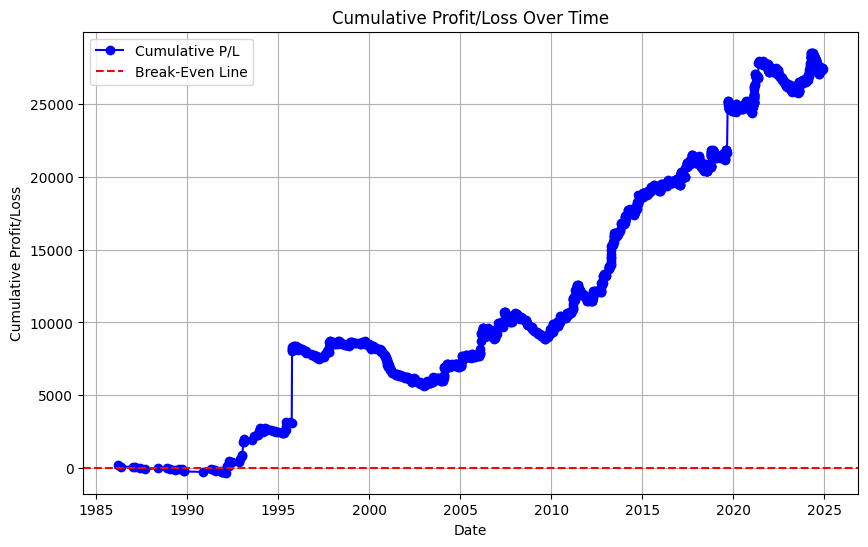

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate cumulative P/L
df['Trade P/L'] = df['Trade P/L'].cumsum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Trade P/L'], marker='o', label='Cumulative P/L', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Break-Even Line')
plt.title('Cumulative Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
win=0
loss=0 
for t in comb['Trade P/L']:
    if t>0:
        win+=1
    if t<0:
        loss+=1
print(win, loss)

502 969
